In [1]:
import random
import bisect
import matplotlib.pyplot as plt
import math
import time

def method_in(a,b,c):    
    start_time = time.time()
    for i,x in enumerate(a):
        if x in b:
            c[i] = 1
    return(time.time()-start_time)   

def method_set_in(a,b,c):
    start_time = time.time()
    s = set(b)
    for i,x in enumerate(a):
        if x in s:
            c[i] = 1
    return(time.time()-start_time)

def method_bisect(a,b,c):

    start_time = time.time()
    b.sort()
    for i,x in enumerate(a):
        index = bisect.bisect_left(b,x)
        if index < len(a):
            if x == b[index]:
                c[i] = 1
    return(time.time()-start_time)

def profile():

    time_method_in = []
    time_method_set_in = []
    time_method_bisect = []

    Nls = [x for x in range(1000,20000,1000)]
    for N in Nls:

        a = [x for x in range(0,N)]
        random.shuffle(a)
        b = [x for x in range(0,N)]
        random.shuffle(b)
        c = [0 for x in range(0,N)]

        time_method_in.append(math.log(method_in(a,b,c)))
        time_method_set_in.append(math.log(method_set_in(a,b,c)))
        time_method_bisect.append(math.log(method_bisect(a,b,c)))

    plt.plot(Nls,time_method_in,marker='o',color='r',linestyle='-',label='in')
    plt.plot(Nls,time_method_set_in,marker='o',color='b',linestyle='-',label='set')
    plt.plot(Nls,time_method_bisect,marker='o',color='g',linestyle='-',label='bisect')
    plt.xlabel('list size', fontsize=18)
    plt.ylabel('log(time)', fontsize=18)
    plt.legend(loc = 'upper left')
    plt.show()

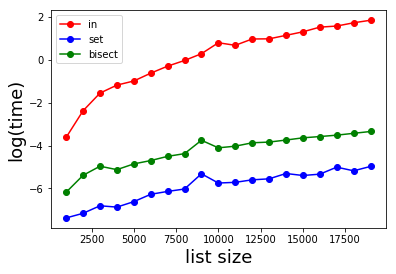

In [2]:
profile()